In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
train_data = pd.read_csv('../data/train_processed.csv', index_col=0)
test_data = pd.read_csv('../data/test_processed.csv', index_col=0)

In [65]:
train_data.head()

,SiteId,Value,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,,
2014-09-03 00:00:00,1,9.096555e+05,2,3,246,9,2014,0.0,8.660254e-01,-0.5,-0.888057,-0.459733,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,19.0
2014-09-04 00:00:00,1,1.748273e+06,3,4,247,9,2014,0.0,1.224647e-16,-1.0,-0.895839,-0.444378,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,20.0
2014-09-05 00:00:00,1,4.031663e+06,4,5,248,9,2014,0.0,-8.660254e-01,-0.5,-0.903356,-0.428892,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,22.0
2014-09-06 00:00:00,1,4.031663e+06,5,6,249,9,2014,0.0,-8.660254e-01,0.5,-0.910605,-0.413279,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,21.0
2014-09-07 00:00:00,1,4.031663e+06,6,7,250,9,2014,0.0,-2.449294e-16,1.0,-0.917584,-0.397543,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,13.0


In [66]:
test_data.head()

,SiteId,Value,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-29 00:00:00,1,7.413780e+06,5,29,241,8,2015,0.0,-8.660254e-01,0.5,-0.845249,-0.534373,-0.866025,-5.000000e-01,0.0,1.0,1.0,18.0,1387.205119,16.0
2015-08-30 00:00:00,1,8.927612e+06,6,30,242,8,2015,0.0,-2.449294e-16,1.0,-0.854322,-0.519744,-0.866025,-5.000000e-01,0.0,1.0,1.0,18.0,1387.205119,20.0
2015-08-31 00:00:00,1,7.288439e+06,0,31,243,8,2015,0.0,0.000000e+00,1.0,-0.863142,-0.504961,-0.866025,-5.000000e-01,0.0,1.0,0.0,18.0,1387.205119,20.0
2015-09-01 00:00:00,1,8.399679e+06,1,1,244,9,2015,0.0,8.660254e-01,0.5,-0.871706,-0.490029,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,21.7
2015-09-02 00:00:00,1,7.576456e+06,2,2,245,9,2015,0.0,8.660254e-01,-0.5,-0.880012,-0.474951,-1.000000,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,23.0


In [69]:
def process_data(data: pd.DataFrame):
    data = data.dropna()
    labels = data['Value']
    df = data.drop(columns=['Value'])
    # df = df.drop(columns=['wday_sin', 'wday_cos', 'yday_sin', 'yday_cos', 'month_sin', 'month_cos', 'time_sin', 'time_cos'])
    return df, labels

train_x, train_y = process_data(train_data)
test_x, test_y = process_data(test_data)

In [70]:
train_x.head()

,SiteId,wday,mday,yday,month,year,time,wday_sin,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
Timestamp,,,,,,,,,,,,,,,,,,,
2014-09-03 00:00:00,1,2,3,246,9,2014,0.0,8.660254e-01,-0.5,-0.888057,-0.459733,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,19.0
2014-09-04 00:00:00,1,3,4,247,9,2014,0.0,1.224647e-16,-1.0,-0.895839,-0.444378,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,20.0
2014-09-05 00:00:00,1,4,5,248,9,2014,0.0,-8.660254e-01,-0.5,-0.903356,-0.428892,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,22.0
2014-09-06 00:00:00,1,5,6,249,9,2014,0.0,-8.660254e-01,0.5,-0.910605,-0.413279,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,21.0
2014-09-07 00:00:00,1,6,7,250,9,2014,0.0,-2.449294e-16,1.0,-0.917584,-0.397543,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,13.0


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [75]:
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)

pred_y = linear_model.predict(test_x)

[]

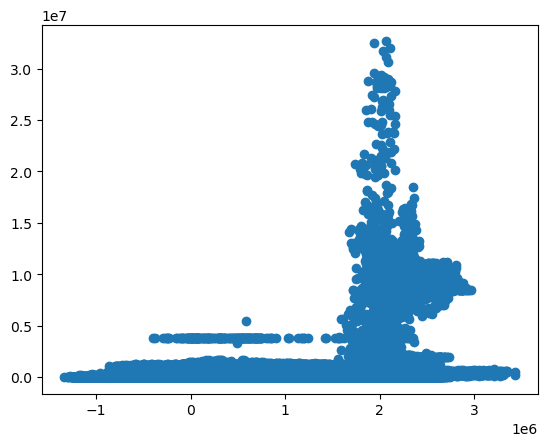

In [81]:
plt.scatter(pred_y, test_y)
plt.plot()

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred_y)

641135.6231512628

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

regressor.fit(train_x, train_y)

pred_y = regressor.predict(test_x)

In [ ]:
plt.scatter(pred_y, test_y)
plt.plot()

In [73]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(test_y, pred_y)

816895252310.071